In [1]:
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

import numpy
import custom
import torch
import torch.nn as nn
import pandas
import matplotlib.pyplot as plt

In [12]:
def make_word_pair(corpus, window_size = 1) :
    word_pair = []
    for s in corpus :
        for w in range(len(s)) :
            for i in range(1,window_size+1) :
                if w-i >= 0 :
                    temp = [s[w], s[w-i]]
                    word_pair.append(temp)
                if w+i < len(s) :
                    if s[w+i] > 0 :
                        temp = [s[w], s[w+i]]
                        word_pair.append(temp)
    
    return word_pair

In [3]:
sentences = [
    'He is a king.',
    'She is a queen.',
    'He is a man.',
    'She is a woman.',
    'Warsaw is Poland capital.',
    'Berlin is Germany capital.',
    'Paris is France capital.',
    'Seoul is Korea capital.', 
    'Bejing is China capital.',
    'Tokyo is Japan capital.',
]

word_dict, number_dict = custom.make_dict(sentences)
corpus = custom.word_num_encoding(sentences, word_dict)
comatrix = custom.make_comatrix(corpus, len(word_dict), window_size=2)

print(word_dict)
print(corpus)
print(comatrix)

{'<pad>': 0, '<unk>': 1, 'he': 2, 'is': 3, 'a': 4, 'king': 5, 'she': 6, 'queen': 7, 'man': 8, 'woman': 9, 'warsaw': 10, 'poland': 11, 'capital': 12, 'berlin': 13, 'germany': 14, 'paris': 15, 'france': 16, 'seoul': 17, 'korea': 18, 'bejing': 19, 'china': 20, 'tokyo': 21, 'japan': 22}
[[ 2  3  4  5]
 [ 6  3  4  7]
 [ 2  3  4  8]
 [ 6  3  4  9]
 [10  3 11 12]
 [13  3 14 12]
 [15  3 16 12]
 [17  3 18 12]
 [19  3 20 12]
 [21  3 22 12]]
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 2. 2. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 2. 0. 4. 1. 2. 1. 1. 1. 1. 1. 6. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [0. 0. 2. 4. 0. 1. 2. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 2. 2. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.

In [14]:
word_pair = make_word_pair(corpus, 2)

print(word_pair)

[[2, 3], [2, 4], [3, 2], [3, 4], [3, 5], [4, 3], [4, 5], [4, 2], [5, 4], [5, 3], [6, 3], [6, 4], [3, 6], [3, 4], [3, 7], [4, 3], [4, 7], [4, 6], [7, 4], [7, 3], [2, 3], [2, 4], [3, 2], [3, 4], [3, 8], [4, 3], [4, 8], [4, 2], [8, 4], [8, 3], [6, 3], [6, 4], [3, 6], [3, 4], [3, 9], [4, 3], [4, 9], [4, 6], [9, 4], [9, 3], [10, 3], [10, 11], [3, 10], [3, 11], [3, 12], [11, 3], [11, 12], [11, 10], [12, 11], [12, 3], [13, 3], [13, 14], [3, 13], [3, 14], [3, 12], [14, 3], [14, 12], [14, 13], [12, 14], [12, 3], [15, 3], [15, 16], [3, 15], [3, 16], [3, 12], [16, 3], [16, 12], [16, 15], [12, 16], [12, 3], [17, 3], [17, 18], [3, 17], [3, 18], [3, 12], [18, 3], [18, 12], [18, 17], [12, 18], [12, 3], [19, 3], [19, 20], [3, 19], [3, 20], [3, 12], [20, 3], [20, 12], [20, 19], [12, 20], [12, 3], [21, 3], [21, 22], [3, 21], [3, 22], [3, 12], [22, 3], [22, 12], [22, 21], [12, 22], [12, 3]]


In [15]:
x = []
t = []
for data in word_pair :
    x.append(data[0])
    t.append(data[1])


In [24]:
device = "cuda" if torch.cuda.is_available() else "cpu"

class NN(nn.Module) :
    def __init__(self, word_size) :
        super().__init__();
        self.f = nn.Embedding(word_size, 2, device = device, max_norm=1, padding_idx=0)
        self.g = nn.Linear(2, word_size, device = device)
    def forward(self, x) :
        y = self.f(x)
        y = self.g(y)
        return y

tensor_x = torch.tensor(x, dtype = torch.long, device = device)
tensor_t = torch.tensor(t, dtype = torch.long, device = device)

F = NN(len(word_dict))
loss_function = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(F.parameters())
epoch = 3000

for e in range(epoch) :
    tensor_y = F(tensor_x)

    loss = loss_function(tensor_y, tensor_t)

    loss.backward()
    optimizer.step()
    optimizer.zero_grad()

    if (e+1) % 100 == 0 :
        print("epoch {} | loss {}".format(e+1, loss))

epoch 100 | loss 3.178942918777466
epoch 200 | loss 3.038755416870117
epoch 300 | loss 2.9051766395568848
epoch 400 | loss 2.776942491531372
epoch 500 | loss 2.6595237255096436
epoch 600 | loss 2.5553579330444336
epoch 700 | loss 2.4696407318115234
epoch 800 | loss 2.404914140701294
epoch 900 | loss 2.3551619052886963
epoch 1000 | loss 2.3166251182556152
epoch 1100 | loss 2.287808895111084
epoch 1200 | loss 2.2635347843170166
epoch 1300 | loss 2.242081880569458
epoch 1400 | loss 2.2235097885131836
epoch 1500 | loss 2.207143545150757
epoch 1600 | loss 2.192366361618042
epoch 1700 | loss 2.1789848804473877
epoch 1800 | loss 2.1668496131896973
epoch 1900 | loss 2.155837297439575
epoch 2000 | loss 2.1458303928375244
epoch 2100 | loss 2.1367080211639404
epoch 2200 | loss 2.1283936500549316
epoch 2300 | loss 2.120964288711548
epoch 2400 | loss 2.114168167114258
epoch 2500 | loss 2.107924699783325
epoch 2600 | loss 2.102172613143921
epoch 2700 | loss 2.096858024597168
epoch 2800 | loss 2.0919

In [25]:

vector_df = pandas.DataFrame(F.state_dict()['f.weight'].numpy(), columns = ['a','b'])
vector_df['word'] = list(word_dict.keys())

print(vector_df)

           a         b     word
0   0.000000  0.000000    <pad>
1   0.601158  0.537198    <unk>
2  -0.789327  0.615383       he
3  -0.195768 -0.244313       is
4   0.822759  0.257774        a
5  -0.703048  0.712746     king
6  -0.790797  0.613526      she
7  -0.668246  0.745569    queen
8  -0.763350  0.647504      man
9  -0.652548  0.759402    woman
10  0.641381  0.768734   warsaw
11 -0.497104 -0.263327   poland
12  0.515091  0.858502  capital
13  0.428425  0.904448   berlin
14 -0.393097 -0.411356  germany
15  0.360174  0.933874    paris
16 -0.947798 -0.319609   france
17  0.527053  0.850985    seoul
18 -0.540663 -0.315411    korea
19  0.578332  0.817264   bejing
20 -0.954694 -0.298371    china
21  0.489812  0.873116    tokyo
22 -0.933410 -0.273658    japan


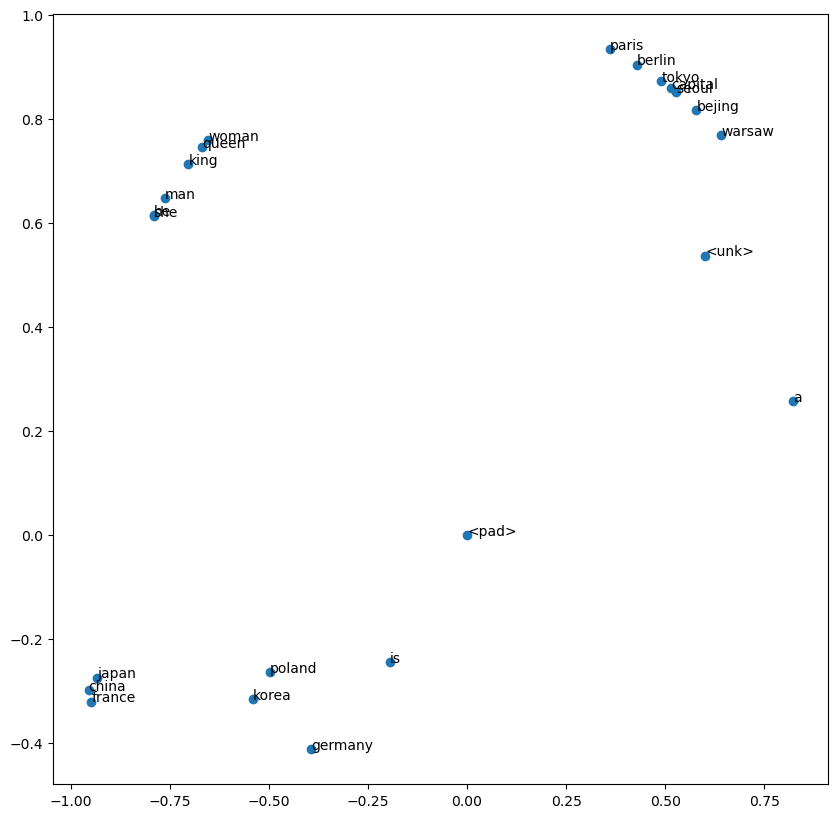

In [26]:
ano = vector_df['word'].values.tolist()
a = vector_df['a'].values.tolist()
b = vector_df['b'].values.tolist()

fig, ax = plt.subplots(figsize = (10,10))
ax.scatter(a,b)

for i in range(len(ano)) :
    ax.annotate(ano[i], (a[i], b[i]))

plt.show()

In [3]:
test = nn.Linear(5,2)
a = torch.randn(1,5)

print(test(a))
print(numpy.dot(a.numpy(), test.state_dict()['weight'].T.numpy()) + test.state_dict()['bias'].numpy())

tensor([[ 1.5859, -0.2268]], grad_fn=<AddmmBackward0>)
[[ 1.5858903  -0.22676873]]
